In [230]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [231]:
print("Loading Iris dataset...")
data = load_iris(return_X_y=True)
print("Iris dataset loaded.")
print("Number of samples: ", len(data[0]))
print("Number of features: ", len(data[0][0]))
print("Number of classes: ", len(np.unique(data[1])))
print("Class labels: ", np.unique(data[1]))


Loading Iris dataset...
Iris dataset loaded.
Number of samples:  150
Number of features:  4
Number of classes:  3
Class labels:  [0 1 2]


In [232]:
X = data[0]
Y = data[1]
data = np.concatenate((X,np.expand_dims(Y,axis=1)),axis=1)
np.random.shuffle(data)

In [233]:
trainData, testData = data[:int(len(data)*0.7),:], data[int(len(data)*0.7):,:] # 70% training, 30% testing
trainData_X, trainData_Y = trainData[:,:-1], trainData[:,-1]
testData_X, testData_Y = testData[:,:-1], testData[:,-1]


In [234]:
trainData_X[0], trainData_Y[0]

(array([4.9, 2.4, 3.3, 1. ]), 1.0)

In [235]:
test_sample = testData_X[0]

In [236]:
from sklearn.metrics.pairwise import euclidean_distances

In [237]:
euclidean_distances(trainData_X, np.expand_dims(test_sample,axis=0))

array([[3.17962262],
       [1.62480768],
       [4.82286222],
       [0.71414284],
       [5.02692749],
       [1.22474487],
       [0.58309519],
       [4.65832588],
       [0.76157731],
       [2.10475652],
       [5.16526863],
       [2.05669638],
       [1.21655251],
       [4.96185449],
       [0.78102497],
       [4.74763099],
       [0.41231056],
       [1.46287388],
       [4.74552421],
       [4.65510472],
       [1.96468827],
       [0.74161985],
       [4.75289386],
       [4.79687398],
       [0.99498744],
       [4.73919824],
       [2.00499377],
       [0.97467943],
       [1.04880885],
       [0.9591663 ],
       [0.54772256],
       [2.30867928],
       [2.00748599],
       [5.40925133],
       [1.55884573],
       [0.55677644],
       [2.45153013],
       [4.77283983],
       [1.22474487],
       [0.92736185],
       [1.92353841],
       [5.08920426],
       [4.67653718],
       [4.52327315],
       [1.78325545],
       [2.55929678],
       [4.81767579],
       [0.374

In [238]:
dist = np.concatenate(
    (euclidean_distances(trainData_X, np.expand_dims(test_sample,axis=0)),
    np.expand_dims(trainData_Y,axis=1)),
    axis=1
)

In [239]:
dist

array([[3.17962262, 1.        ],
       [1.62480768, 1.        ],
       [4.82286222, 0.        ],
       [0.71414284, 2.        ],
       [5.02692749, 0.        ],
       [1.22474487, 2.        ],
       [0.58309519, 2.        ],
       [4.65832588, 0.        ],
       [0.76157731, 2.        ],
       [2.10475652, 1.        ],
       [5.16526863, 0.        ],
       [2.05669638, 1.        ],
       [1.21655251, 2.        ],
       [4.96185449, 0.        ],
       [0.78102497, 1.        ],
       [4.74763099, 0.        ],
       [0.41231056, 2.        ],
       [1.46287388, 1.        ],
       [4.74552421, 0.        ],
       [4.65510472, 0.        ],
       [1.96468827, 1.        ],
       [0.74161985, 2.        ],
       [4.75289386, 0.        ],
       [4.79687398, 0.        ],
       [0.99498744, 2.        ],
       [4.73919824, 0.        ],
       [2.00499377, 1.        ],
       [0.97467943, 1.        ],
       [1.04880885, 2.        ],
       [0.9591663 , 2.        ],
       [0.

In [240]:
dist = dist[dist[:,0].argsort()]


In [241]:
k=7
dist[:k]

array([[0.17320508, 2.        ],
       [0.36055513, 2.        ],
       [0.37416574, 2.        ],
       [0.41231056, 2.        ],
       [0.41231056, 2.        ],
       [0.51961524, 2.        ],
       [0.54772256, 2.        ]])

In [242]:
unique_elements, counts_elements = np.unique(dist[:k][:,1], return_counts=True)

In [243]:
unique_elements, counts_elements

(array([2.]), array([7], dtype=int64))

In [244]:
frequency = np.concatenate(
    (np.expand_dims(unique_elements,axis=1),
    np.expand_dims(counts_elements,axis=1)),
    axis=1
)
frequency = frequency[frequency[:,1].argsort()]

In [245]:
frequency

array([[2., 7.]])

In [246]:
pred_label = frequency[0,0]
pred_label

2.0

In [247]:
def knn(trainData_X, trainData_Y, test_sample, k=7):
    dist = np.concatenate(
        (euclidean_distances(trainData_X, np.expand_dims(test_sample,axis=0)),
        np.expand_dims(trainData_Y,axis=1)),
        axis=1
    )
    dist = dist[dist[:,0].argsort()]
    unique_elements, counts_elements = np.unique(dist[:k][:,1], return_counts=True)
    frequency = np.concatenate(
        (np.expand_dims(unique_elements,axis=1),
        np.expand_dims(counts_elements,axis=1)),
        axis=1
    )
    frequency = frequency[frequency[:,1].argsort()]
    pred_label = frequency[0,0]
    return pred_label

knn(trainData_X, trainData_Y, test_sample, k=7)

2.0

In [248]:
knn(trainData_X, trainData_Y, testData_X[3], k=7)

0.0

In [249]:
from sklearn.datasets import load_wine
print('Loading Wine dataset...')
data = load_wine(return_X_y=True)
print('Wine dataset loaded.')
print('Number of samples: ', len(data[0]))
print('Number of features: ', len(data[0][0]))
print('Number of classes: ', len(np.unique(data[1])))
print('Class labels: ', np.unique(data[1]))


Loading Wine dataset...
Wine dataset loaded.
Number of samples:  178
Number of features:  13
Number of classes:  3
Class labels:  [0 1 2]


In [250]:
X = data[0]
Y = data[1]
data = np.concatenate((X,np.expand_dims(Y,axis=1)),axis=1)
np.random.shuffle(data)
trainData, testData = data[:int(len(data)*0.7),:], data[int(len(data)*0.7):,:] # 70% training, 30% testing
trainData_X, trainData_Y = trainData[:,:-1], trainData[:,-1]
testData_X, testData_Y = testData[:,:-1], testData[:,-1]


In [251]:
trainData_X[0], trainData_Y[0]

(array([1.367e+01, 1.250e+00, 1.920e+00, 1.800e+01, 9.400e+01, 2.100e+00,
        1.790e+00, 3.200e-01, 7.300e-01, 3.800e+00, 1.230e+00, 2.460e+00,
        6.300e+02]),
 1.0)

In [252]:
test_sample = testData_X[0]
knn(trainData_X, trainData_Y, test_sample)


2.0

In [253]:
pred_list = [knn(trainData_X, trainData_Y, testData_X[i]) for i in range( testData_X.shape[0])]

In [254]:
print(pred_list)

[2.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 2.0, 1.0, 0.0, 2.0, 2.0, 1.0, 0.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 0.0, 1.0, 1.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 2.0, 1.0, 2.0, 0.0, 1.0, 0.0, 2.0, 2.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 1.0, 2.0, 2.0, 1.0, 1.0]


In [255]:
matchCount = 0
for i in range(len(testData_Y)):
    if testData_Y[i] == pred_list[i]:
        matchCount += 1
print(matchCount)

28


In [256]:
matchCount/len(testData_Y)

0.5185185185185185

In [257]:
accuracy_on_k = [np.sum([1 if knn(trainData_X, trainData_Y, testData_X[i],k) == testData_Y[i] else 0
        for i in range(len(testData_X)) ]) / len(testData_X)
        for k in range(3,120,4) ]

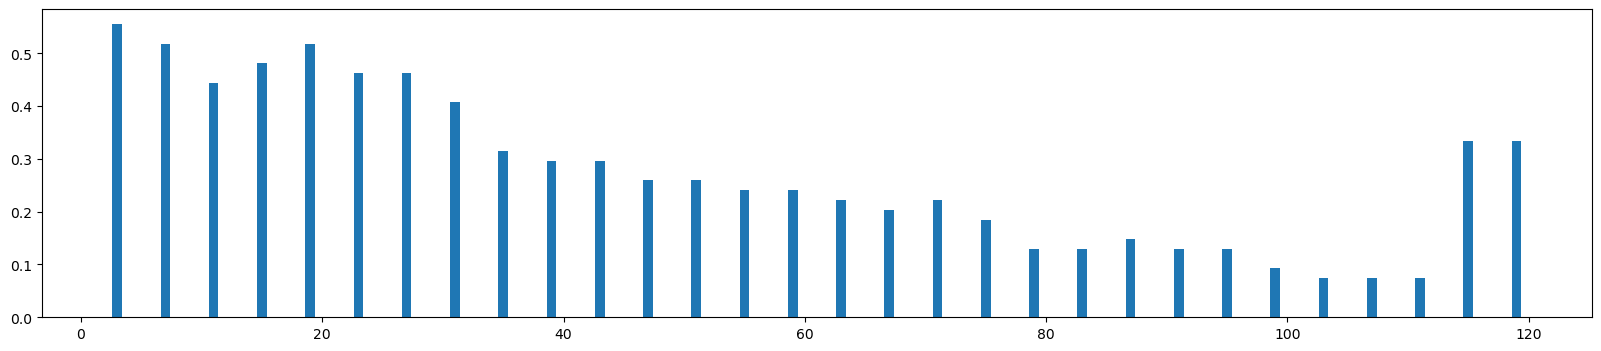

In [258]:
plt.figure(figsize=(20,4))
plt.bar(np.arange(3,120,4),accuracy_on_k)
plt.show()